<a href="https://colab.research.google.com/github/EdisonMoreira/-aquecimento-formacao-infra/blob/master/aquecendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Escritório de Dados</font>

## Aquecimento para Formação de Infraestrutura
## Edison Moreira
### Iplanrio / Diretoria de Sistemas (DSI) / Gerência de Arquitetura e Integrações (GAI)

## Pipeline
### Etapa 1: Entendendo os dados 🎲

- **Objetivo:** nessa etapa, você deve somente ingerir dados da API do `randomuser.me` e observar o formato dos dados, tentando imaginar como eles poderiam ser usados para construir uma tabela.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para consumir a API na URL `https://randomuser.me/api/` e retornar um dicionário com os dados.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [3]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import da package para tratamento de acesso a uma API
import requests

## Ingerindo os Dados

Acessando os dados na API Random User

Confirmando o sucesso do acesso que é 
API Status Code 200: Everything went okay, 
and the result has been returned (if any).

In [5]:
response = requests.get("https://randomuser.me/api/")
print(response.status_code)

200


Exibindo o conteúdo do response que tem o formato json,
estrutura dictionary

In [6]:
response.json()

{'results': [{'gender': 'female',
   'name': {'title': 'Mademoiselle', 'first': 'Cristina', 'last': 'Philippe'},
   'location': {'street': {'number': 5792,
     'name': "Place des 44 Enfants D'Izieu"},
    'city': 'Iseltwald',
    'state': 'Luzern',
    'country': 'Switzerland',
    'postcode': 4839,
    'coordinates': {'latitude': '-62.3879', 'longitude': '34.5037'},
    'timezone': {'offset': '+1:00',
     'description': 'Brussels, Copenhagen, Madrid, Paris'}},
   'email': 'cristina.philippe@example.com',
   'login': {'uuid': '3c879466-1bb4-4cfb-97ba-b2b7b16e0468',
    'username': 'redpanda228',
    'password': 'plumber',
    'salt': 'SSrU0SuB',
    'md5': 'e09c4be694d65887a8c24eaaf7b87dac',
    'sha1': 'd358c2dd7667cf64864b3f2b686f453ca74c5157',
    'sha256': 'af4a3602ea9141f80a03350f2e735ecabf8e7096929358147284616131aff99f'},
   'dob': {'date': '1986-11-11T19:14:27.989Z', 'age': 36},
   'registered': {'date': '2011-03-07T21:23:43.625Z', 'age': 11},
   'phone': '079 023 59 52',
   '

### Etapa 2: Coletando dados 💾

- **Objetivo:** nessa etapa, você deve coletar dados da API e armazená-los em um arquivo CSV.
- **Descrição da solução:** a solução dessa etapa consiste em uma função para coletar uma quantidade `n` de dados da API (sendo `n` um valor fornecido via parâmetro da função), manipulá-los para montar um `pandas.DataFrame` e salvar o resultado em um arquivo CSV.
**Dicas:**
  - Para tornar os dados mais fáceis de manipular no futuro, faça com que o `DataFrame` seja "plano", ou seja, cada coluna seja um único atributo do objeto.
  - Para ter dados suficientes para uma análise razoável nas próximas etapas, recomendamos `n>=500`.

In [8]:
# Importação do Pandas para manuseio de Dataframes
# Exibição de todas colunas do Dataframe
import pandas as pd
pd.set_option("display.max.columns", None)

In [9]:
# Função para coletar uma quantidade n de dados da API (sendo n um valor fornecido via parâmetro da função),
def coletaDado (quantidadeDado: int):
    parametroAPI="https://randomuser.me/api/?results=" + str(quantidadeDado)
    print(parametroAPI)
    return requests.get(parametroAPI)

In [10]:
responseDados = coletaDado(1000)
print(responseDados.status_code)

https://randomuser.me/api/?results=1000
200


In [11]:
# Formatação para json
responseDict=responseDados.json()

In [12]:
# Uso do  json_normalize() to convert JSON (dict, list of dicts) to DataFrame Plano, cada campo uma coluna
import json
from pandas import json_normalize
df = json_normalize(responseDict['results']) 

In [13]:
# Salva do Datafrme em formato .csv para uso em utilitários de planilhas
df.to_csv('todos_campos_usuarios.csv', encoding='utf-8')

### Etapa 3: Manipulando dados 📝

- **Objetivo**: agora, você pode observar que, na base de dados obtida, devido às diferentes nacionalidades dos usuários, os números de telefone e celular têm formatos diferentes. Você deve transformá-los para um formato único, escolhido arbitrariamente.
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e retorna um `pandas.DataFrame` com as mesmas colunas, mas com os números de telefone e celular formatados de forma única.

### package para identificação, tratamento, formatação de phone numbers

In [18]:
pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import phonenumbers

# Padrão E.164 formato Internacional
# opção de uso do re.match().
import re

regex = r"([0-9 -()]+)"
 

In [20]:
# Transformação do campo nat (naturalidade) a partir do campos phone e cell
# usando phonenumbers
def transforma_phone_cell (df_original, campo_a_transformar, campo_referencia):
  df_alterado=df_original.copy()
  for ind in df_original.index:
    match = re.search(regex, df_original[campo_a_transformar][ind])
    if match is True:
      phoneIntAux = phonenumbers.parse(df_original[campo_a_transformar][ind], df[campo_referencia][ind])
      phoneInt = phonenumbers.format_number(phoneIntAux, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
      df_alterado.loc[ind, campo_a_transformar]  = phoneInt  

  return df_alterado      

In [23]:
# chamada de função para tratamento do phone ou cell number e transformação de sigla Nat para texto
df_com_descriçao_pais=transforma_phone_cell (df, "phone", "nat")

In [24]:
df_com_descriçao_pais=transforma_phone_cell (df, "cell", "nat")

In [25]:
df_com_descriçao_pais.head()

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,phoebe.jackson@example.com,(058)-040-7138,(572)-852-6237,NZ,Mrs,Phoebe,Jackson,9154,Panama Road,Invercargill,Hawke'S Bay,New Zealand,52795,51.7839,19.1804,+3:30,Tehran,c499ea54-7806-45b9-a39f-87f7609e061b,yellowleopard529,moscow,FbAwTLNm,9939dc5796c319d865fd6df9e4815b2e,dbc725a29f8ee52d9dcb66480725a9caa7c73179,c9c541773f1e348a4e2f44ab4f8aab0f52387af4f3fc39...,2000-12-21T18:59:24.255Z,22,2011-06-24T04:48:24.167Z,11,,None,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,audrey.ellis@example.com,(293) 262-6475,(658) 359-6586,US,Miss,Audrey,Ellis,5970,Nowlin Rd,Omaha,Ohio,United States,95960,-66.8183,-67.4516,-3:30,Newfoundland,e8b4d83a-35bf-4d13-b598-aaf956588937,tinyladybug554,italia,LvytGGLl,4e4acebe1184c7d45200bbff5fc55f1c,78c90b843c120cd9fcbe897d24c4fd8a749d72c0,66fd6bc510e1d7672c2970801ebfbd699370634caf018e...,1973-07-23T06:43:46.881Z,49,2018-08-19T15:01:31.024Z,4,SSN,851-67-1417,https://randomuser.me/api/portraits/women/16.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
2,male,nicholas.mitchell@example.com,015396 64876,07096 734125,GB,Mr,Nicholas,Mitchell,6401,Church Street,Chester,County Fermanagh,United Kingdom,LB4 0TA,67.7937,-11.7578,+4:00,"Abu Dhabi, Muscat, Baku, Tbilisi",88d21e50-b4a7-4c99-9d28-fa8dad929b17,happyladybug673,qazwsx,oetfaX8m,1ffd0977612a32ffad9d33df68d03392,7cc7c037f6c416daea4e93e20da62c6edcd4805b,1091cc267a1020febbc8ac00ac35a76bb6e4075bbcbea6...,1979-01-11T15:07:12.698Z,44,2016-04-02T19:40:03.793Z,6,NINO,AJ 66 27 69 T,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...
3,male,miro.kotila@example.com,06-774-744,041-184-37-93,FI,Mr,Miro,Kotila,3037,Mechelininkatu,Mikkeli,Tavastia Proper,Finland,90197,-66.4169,80.5047,-2:00,Mid-Atlantic,66b99a23-3031-4510-8f3b-67a9bb7e5803,smallbutterfly398,maggot,oLJuC6cz,1dd405ee990553c527ec39bb8b1e0166,e6236e2aa0d2dbbfe6dd10a426191f27eeb4b683,cbab0c480f6f1424f659b7b1cba4c446d241a6c191aea2...,1998-07-29T06:54:58.069Z,24,2014-11-23T11:50:16.455Z,8,HETU,NaNNA421undefined,https://randomuser.me/api/portraits/men/99.jpg,https://randomuser.me/api/portraits/med/men/99...,https://randomuser.me/api/portraits/thumb/men/...
4,male,carter.perkins@example.com,051-995-4768,081-072-5470,IE,Mr,Carter,Perkins,2158,Westmoreland Street,Listowel,Kerry,Ireland,40140,6.3395,69.7594,+9:30,"Adelaide, Darwin",e0a9b59b-80d4-4c90-bd94-5977083a6b32,purpledog268,robotics,WU6NT61u,e521ba7aeb0f07d15339530a10bceea2,a022bab7e981e89cce360e2ae16ed443b18e5b57,f945b6eec5d5b40edf135ea7c31d4f19de4f5528f52f96...,1946-03-21T14:46:11.712Z,76,2020-02-07T11:30:15.177Z,3,PPS,5938564T,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...


### Etapa 4: Analisando dados sem agrupamento 📊

- **Objetivo**: com seus dados devidamente tratados, você deve gerar os seguintes itens:
  - Um relatório em texto (não precisa de formatação) contendo:
    - A porcentagem dos usuários por gênero
    - A porcentagem dos usuários por país
  - Uma imagem contendo um gráfico de distribuição da idade dos usuários (a biblioteca utilizada para o `plot` pode ser qualquer uma).
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [26]:
# Imports taramento de matriz e criação plots (relatórios)
import numpy as np
import matplotlib.pyplot as plt

### A porcentagem dos usuários por gênero

In [36]:
print(df["gender"].unique())
print(type(df["gender"].unique()))

['female' 'male']
<class 'numpy.ndarray'>


In [37]:
df['gender'].value_counts()

female    512
male      488
Name: gender, dtype: int64

In [38]:
dfSexos=pd.DataFrame(df['gender'].value_counts())

In [39]:
# Lista auxiliar Sexo
# para alterar o label da coluna gender
sexosLista = dfSexos.columns.tolist()
sexosLista[sexosLista.index('gender')] = 'usuarios'
dfSexos.columns = sexosLista

In [40]:
# Vamos calcular o percentual para cada genero
dfSexos['percentual'] = (dfSexos['usuarios'] / dfSexos['usuarios'].sum()) * 100

In [41]:
#Relatório básico 
display(dfSexos)

,usuarios,percentual
female,512,51.2
male,488,48.8


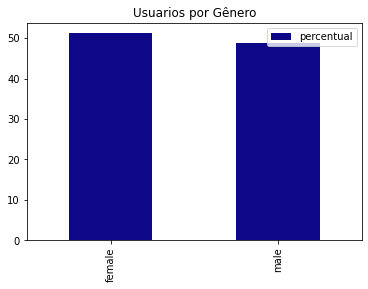

In [42]:
#Gráfico básico
dfSexos.plot(kind='bar',y='percentual', title = 'Usuarios por Gênero', colormap = 'plasma');

## A porcentagem dos usuários por país

Import da package para acesso e tratamento dos países (Country)

In [43]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [44]:
# Listas auxiliares Paises
import pycountry
nomes_paises = []

In [45]:
df.head()

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,phoebe.jackson@example.com,(058)-040-7138,(572)-852-6237,NZ,Mrs,Phoebe,Jackson,9154,Panama Road,Invercargill,Hawke'S Bay,New Zealand,52795,51.7839,19.1804,+3:30,Tehran,c499ea54-7806-45b9-a39f-87f7609e061b,yellowleopard529,moscow,FbAwTLNm,9939dc5796c319d865fd6df9e4815b2e,dbc725a29f8ee52d9dcb66480725a9caa7c73179,c9c541773f1e348a4e2f44ab4f8aab0f52387af4f3fc39...,2000-12-21T18:59:24.255Z,22,2011-06-24T04:48:24.167Z,11,,None,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,audrey.ellis@example.com,(293) 262-6475,(658) 359-6586,US,Miss,Audrey,Ellis,5970,Nowlin Rd,Omaha,Ohio,United States,95960,-66.8183,-67.4516,-3:30,Newfoundland,e8b4d83a-35bf-4d13-b598-aaf956588937,tinyladybug554,italia,LvytGGLl,4e4acebe1184c7d45200bbff5fc55f1c,78c90b843c120cd9fcbe897d24c4fd8a749d72c0,66fd6bc510e1d7672c2970801ebfbd699370634caf018e...,1973-07-23T06:43:46.881Z,49,2018-08-19T15:01:31.024Z,4,SSN,851-67-1417,https://randomuser.me/api/portraits/women/16.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
2,male,nicholas.mitchell@example.com,015396 64876,07096 734125,GB,Mr,Nicholas,Mitchell,6401,Church Street,Chester,County Fermanagh,United Kingdom,LB4 0TA,67.7937,-11.7578,+4:00,"Abu Dhabi, Muscat, Baku, Tbilisi",88d21e50-b4a7-4c99-9d28-fa8dad929b17,happyladybug673,qazwsx,oetfaX8m,1ffd0977612a32ffad9d33df68d03392,7cc7c037f6c416daea4e93e20da62c6edcd4805b,1091cc267a1020febbc8ac00ac35a76bb6e4075bbcbea6...,1979-01-11T15:07:12.698Z,44,2016-04-02T19:40:03.793Z,6,NINO,AJ 66 27 69 T,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...
3,male,miro.kotila@example.com,06-774-744,041-184-37-93,FI,Mr,Miro,Kotila,3037,Mechelininkatu,Mikkeli,Tavastia Proper,Finland,90197,-66.4169,80.5047,-2:00,Mid-Atlantic,66b99a23-3031-4510-8f3b-67a9bb7e5803,smallbutterfly398,maggot,oLJuC6cz,1dd405ee990553c527ec39bb8b1e0166,e6236e2aa0d2dbbfe6dd10a426191f27eeb4b683,cbab0c480f6f1424f659b7b1cba4c446d241a6c191aea2...,1998-07-29T06:54:58.069Z,24,2014-11-23T11:50:16.455Z,8,HETU,NaNNA421undefined,https://randomuser.me/api/portraits/men/99.jpg,https://randomuser.me/api/portraits/med/men/99...,https://randomuser.me/api/portraits/thumb/men/...
4,male,carter.perkins@example.com,051-995-4768,081-072-5470,IE,Mr,Carter,Perkins,2158,Westmoreland Street,Listowel,Kerry,Ireland,40140,6.3395,69.7594,+9:30,"Adelaide, Darwin",e0a9b59b-80d4-4c90-bd94-5977083a6b32,purpledog268,robotics,WU6NT61u,e521ba7aeb0f07d15339530a10bceea2,a022bab7e981e89cce360e2ae16ed443b18e5b57,f945b6eec5d5b40edf135ea7c31d4f19de4f5528f52f96...,1946-03-21T14:46:11.712Z,76,2020-02-07T11:30:15.177Z,3,PPS,5938564T,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...


In [46]:
# Loop para obter o país de acordo com a região
#tratar a contagem desagrupada
for i in range(df.shape[0]):
    try:
        pais = df['nat'].values[i]
        paisDescricao=pycountry.countries.get(alpha_2=pais).name
        nomes_paises.append(paisDescricao)
    except:
        continue

In [47]:
# Prepara e exibe um dictonary com a contagem de usuarios por pais
from collections import Counter
dict_usuario_pais = dict(Counter(nomes_paises))
display(dict_usuario_pais)


{'New Zealand': 60,
 'United States': 50,
 'United Kingdom': 40,
 'Finland': 58,
 'Ireland': 50,
 'Mexico': 37,
 'Canada': 45,
 'Spain': 51,
 'India': 47,
 'Iran, Islamic Republic of': 42,
 'Germany': 38,
 'Norway': 56,
 'France': 50,
 'Brazil': 39,
 'Netherlands': 50,
 'Serbia': 48,
 'Australia': 48,
 'Turkey': 54,
 'Denmark': 44,
 'Ukraine': 49,
 'Switzerland': 44}

In [48]:
# Transform dictonary into a new dataframe
df_usuarios_pais=pd.DataFrame.from_dict(dict_usuario_pais, orient='index', columns=['Usuarios'])


In [49]:
#Relatório básico
df_usuarios_pais.head()

,Usuarios
New Zealand,60
United States,50
United Kingdom,40
Finland,58
Ireland,50


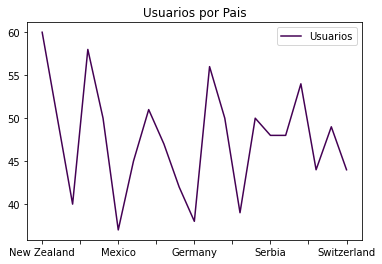

In [50]:
#Gráfico básico, sem exibição do nome de todos os paises que tem usuários
df_usuarios_pais.plot(y='Usuarios', title = 'Usuarios por Pais', colormap = 'viridis');

### Uma imagem contendo um gráfico de distribuição da idade dos usuários


In [51]:
#Tratar a contagem agrupada de usuarios por idade
idades=[]
for i in range(df.shape[0]):
    try:
        idade = df['dob.age'].values[i]
        idades.append(idade)
    except:
        continue

In [52]:
# Prepara e exibe uma collection para contagem de usuarios por idade
from collections import Counter
dict_usuarios_idades = dict(Counter(idades))

In [53]:
list_usuarios_idades_sorted=sorted(dict_usuarios_idades.items())

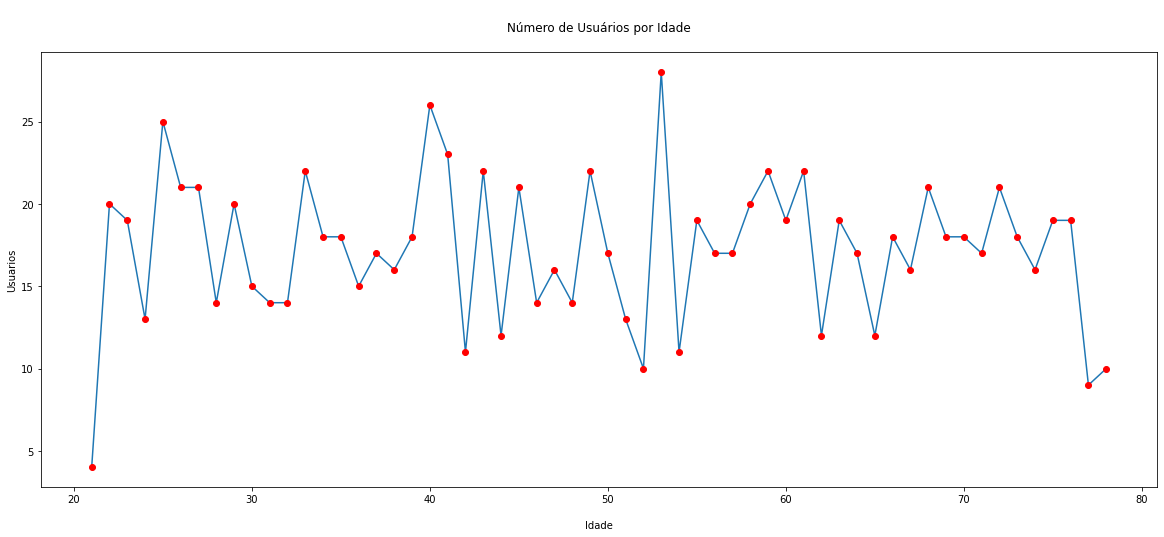

In [54]:
x_val = [x[0] for x in list_usuarios_idades_sorted]
y_val = [x[1] for x in list_usuarios_idades_sorted]

plt.figure(figsize = (20,8))
plt.ylabel('Usuarios')             
plt.xlabel('\nIdade')
plt.title('\nNúmero de Usuários por Idade\n')
plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

In [55]:
# Criação de imagem a s partir de um plot (relatório)

plt.savefig('usuarios_idade.png')
plt.close()

### Etapa 5: Analisando dados com agrupamento 📊

- **Objetivo**: utilizar técnicas de agrupamento para descobrir usuários que moram no mesmo país e estado.
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e retorna um `pandas.DataFrame` com as mesmas colunas, mas com os dados agrupados por país e estado.

In [56]:
df.head(5)

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,phoebe.jackson@example.com,(058)-040-7138,(572)-852-6237,NZ,Mrs,Phoebe,Jackson,9154,Panama Road,Invercargill,Hawke'S Bay,New Zealand,52795,51.7839,19.1804,+3:30,Tehran,c499ea54-7806-45b9-a39f-87f7609e061b,yellowleopard529,moscow,FbAwTLNm,9939dc5796c319d865fd6df9e4815b2e,dbc725a29f8ee52d9dcb66480725a9caa7c73179,c9c541773f1e348a4e2f44ab4f8aab0f52387af4f3fc39...,2000-12-21T18:59:24.255Z,22,2011-06-24T04:48:24.167Z,11,,None,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,audrey.ellis@example.com,(293) 262-6475,(658) 359-6586,US,Miss,Audrey,Ellis,5970,Nowlin Rd,Omaha,Ohio,United States,95960,-66.8183,-67.4516,-3:30,Newfoundland,e8b4d83a-35bf-4d13-b598-aaf956588937,tinyladybug554,italia,LvytGGLl,4e4acebe1184c7d45200bbff5fc55f1c,78c90b843c120cd9fcbe897d24c4fd8a749d72c0,66fd6bc510e1d7672c2970801ebfbd699370634caf018e...,1973-07-23T06:43:46.881Z,49,2018-08-19T15:01:31.024Z,4,SSN,851-67-1417,https://randomuser.me/api/portraits/women/16.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
2,male,nicholas.mitchell@example.com,015396 64876,07096 734125,GB,Mr,Nicholas,Mitchell,6401,Church Street,Chester,County Fermanagh,United Kingdom,LB4 0TA,67.7937,-11.7578,+4:00,"Abu Dhabi, Muscat, Baku, Tbilisi",88d21e50-b4a7-4c99-9d28-fa8dad929b17,happyladybug673,qazwsx,oetfaX8m,1ffd0977612a32ffad9d33df68d03392,7cc7c037f6c416daea4e93e20da62c6edcd4805b,1091cc267a1020febbc8ac00ac35a76bb6e4075bbcbea6...,1979-01-11T15:07:12.698Z,44,2016-04-02T19:40:03.793Z,6,NINO,AJ 66 27 69 T,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...
3,male,miro.kotila@example.com,06-774-744,041-184-37-93,FI,Mr,Miro,Kotila,3037,Mechelininkatu,Mikkeli,Tavastia Proper,Finland,90197,-66.4169,80.5047,-2:00,Mid-Atlantic,66b99a23-3031-4510-8f3b-67a9bb7e5803,smallbutterfly398,maggot,oLJuC6cz,1dd405ee990553c527ec39bb8b1e0166,e6236e2aa0d2dbbfe6dd10a426191f27eeb4b683,cbab0c480f6f1424f659b7b1cba4c446d241a6c191aea2...,1998-07-29T06:54:58.069Z,24,2014-11-23T11:50:16.455Z,8,HETU,NaNNA421undefined,https://randomuser.me/api/portraits/men/99.jpg,https://randomuser.me/api/portraits/med/men/99...,https://randomuser.me/api/portraits/thumb/men/...
4,male,carter.perkins@example.com,051-995-4768,081-072-5470,IE,Mr,Carter,Perkins,2158,Westmoreland Street,Listowel,Kerry,Ireland,40140,6.3395,69.7594,+9:30,"Adelaide, Darwin",e0a9b59b-80d4-4c90-bd94-5977083a6b32,purpledog268,robotics,WU6NT61u,e521ba7aeb0f07d15339530a10bceea2,a022bab7e981e89cce360e2ae16ed443b18e5b57,f945b6eec5d5b40edf135ea7c31d4f19de4f5528f52f96...,1946-03-21T14:46:11.712Z,76,2020-02-07T11:30:15.177Z,3,PPS,5938564T,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...


In [57]:
df_agrupados_pais_cidade=df.sort_values(by=["location.country","location.state"])
df_agrupados_pais_cidade.shape[0]

1000

In [59]:
df_agrupados_pais_cidade.tail()

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
575,male,sebastian.shelton@example.com,(745) 433-3984,(955) 359-5339,US,Mr,Sebastian,Shelton,150,Fairview St,Bueblo,Utah,United States,35153,67.2373,134.4610,+4:30,Kabul,f71a54d4-35c9-4ebe-99ab-08383c6789dc,redmeercat150,kitty1,NODM8YxV,83bf17a0f8a60d2cc8f279cfe0355c36,73aa5debc4cf1b4760738c721d39a0fd661acca4,05c493b484902c4a2327cca223b8a67bd3d92c3e89006e...,1999-01-26T22:27:24.550Z,24,2008-08-06T14:08:58.110Z,14,SSN,463-09-7147,https://randomuser.me/api/portraits/men/29.jpg,https://randomuser.me/api/portraits/med/men/29...,https://randomuser.me/api/portraits/thumb/men/...
912,female,shelly.bryant@example.com,(774) 762-9028,(222) 659-7013,US,Ms,Shelly,Bryant,5940,Dane St,Palm Bay,Washington,United States,27877,-56.1317,-74.6547,+10:00,"Eastern Australia, Guam, Vladivostok",8e0abc7f-256c-4caf-83d7-0eb3bf0e23e0,purplezebra675,gabby,xPoLkK56,dbc16a7d2cd486295971c7232baa1f74,2756410194a0dff048dd69b218c9e113dad48967,1d42e0837233d0086b60f45b0834e28f40dc47b8d13677...,1962-04-27T20:17:42.805Z,60,2016-08-20T23:33:49.110Z,6,SSN,005-83-1649,https://randomuser.me/api/portraits/women/47.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
641,female,becky.medina@example.com,(394) 333-0517,(481) 371-7979,US,Miss,Becky,Medina,6013,E Sandy Lake Rd,Laredo,West Virginia,United States,53023,-59.4068,-130.1020,+9:30,"Adelaide, Darwin",0e117fe4-a3eb-46bf-af74-193afc7ad01a,redgoose947,martine,Vhap0JLm,ea8b65587bfa4c266b18ce0829f2e7ae,6b165e8ab4c00f96fd525fce13bfb26515a88229,49934ac0b4233add43a7a8329d9a9967d9d2a14ab7345d...,1948-10-09T22:49:40.464Z,74,2010-03-27T22:21:31.039Z,12,SSN,340-32-8477,https://randomuser.me/api/portraits/women/17.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
395,male,hector.garrett@example.com,(309) 649-2935,(669) 590-1351,US,Mr,Hector,Garrett,5246,Oak Lawn Ave,Vancouver,Wisconsin,United States,72293,4.2250,-175.1518,+4:30,Kabul,8566d0cb-443b-4a87-946d-e7f92d402abe,angrylion473,norman,JpMlm2hV,dac7b370c17689beeed5f8387ca1076a,eb3d8fd9ab8452f412cdc1aba99869796ac50c4c,c70a87c3d87b9bca03e31a1fd866b1cca8f73d98d47503...,1966-08-12T08:00:12.662Z,56,2017-07-25T05:34:55.953Z,5,SSN,665-46-2185,https://randomuser.me/api/portraits/men/42.jpg,https://randomuser.me/api/portraits/med/men/42...,https://randomuser.me/api/portraits/thumb/men/...
413,male,glen.flores@example.com,(987) 311-0142,(531) 213-6691,US,Mr,Glen,Flores,9814,Avondale Ave,Pompano Beach,Wyoming,United States,81914,64.6162,166.4774,-5:00,"Eastern Time (US & Canada), Bogota, Lima",15de8d81-2638-4a93-a875-99b86d0abc10,brownswan365,19691969,iu3x5xf4,0b4bf5b8996158043b89a7c31bec7601,cb7f00c1e19df9307e478496acde3fcb9059cfa3,38f2061cb325bcf9e80ed1ec7b0981ec368247651956f9...,1987-06-05T10:10:24.775Z,35,2018-07-19T11:15:07.190Z,4,SSN,875-41-1849,https://randomuser.me/api/portraits/men/88.jpg,https://randomuser.me/api/portraits/med/men/88...,https://randomuser.me/api/portraits/thumb/men/...


In [60]:
# data frame agrupado por pais e cidade, somente os que tem mais de uma ocorrencia
df.somente_duplicados=df_agrupados_pais_cidade.groupby(["location.country","location.state"]).filter(lambda x: len(x)>1)
df.somente_duplicados.head()

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,location.city,location.state,location.country,location.postcode,location.coordinates.latitude,location.coordinates.longitude,location.timezone.offset,location.timezone.description,login.uuid,login.username,login.password,login.salt,login.md5,login.sha1,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
136,male,harold.long@example.com,09-3241-6097,0426-903-991,AU,Mr,Harold,Long,8462,Spring St,Rockhampton,Australian Capital Territory,Australia,4374,72.2408,60.2276,+3:30,Tehran,042935c2-a5d7-4ca8-8708-0ad0b81d704f,ticklishswan378,milfnew,HspNwSoG,7cf857c92d8ac60b24b38c94ffbe6c9e,e209a859b41c8db43ed29fcca075f7051f73b26d,ebc6e797f761c6e62ac4a21a56cc43f8a20abae44ed7a1...,1946-12-22T09:22:19.268Z,76,2015-05-16T02:46:21.221Z,7,TFN,266737556,https://randomuser.me/api/portraits/men/13.jpg,https://randomuser.me/api/portraits/med/men/13...,https://randomuser.me/api/portraits/thumb/men/...
191,male,alfredo.gonzalez@example.com,06-1505-6830,0413-421-556,AU,Mr,Alfredo,Gonzalez,4978,Central St,Sydney,Australian Capital Territory,Australia,255,16.1694,30.5741,+11:00,"Magadan, Solomon Islands, New Caledonia",667fea23-df8a-41ef-9c28-f49e2b6a76e5,orangezebra187,weller,GDEg3w7A,0886aac5cf214cf097d1d1386c14c6b3,c96adfd7bd7875763811727c0fa618fa860538dc,9a84073eb4749cb03830272b15ebdcba9c751cd32c61ff...,1969-09-12T13:23:47.911Z,53,2010-05-20T03:20:19.462Z,12,TFN,728625571,https://randomuser.me/api/portraits/men/86.jpg,https://randomuser.me/api/portraits/med/men/86...,https://randomuser.me/api/portraits/thumb/men/...
288,female,florence.watkins@example.com,05-9276-7233,0426-309-968,AU,Mrs,Florence,Watkins,1349,Marsh Ln,Bendigo,Australian Capital Territory,Australia,8834,-32.9974,112.7678,+1:00,"Brussels, Copenhagen, Madrid, Paris",ce8fc784-8883-4bf8-bb12-e0a2bebe5d35,whitetiger706,cantona,sCxqyUHK,d390b4583480298713c832e5d2cffa3f,5fed5451a29398245d3d4c2773b29b0f78317a78,d90c26a88b9e8f801a7312cd0f1f427552bcf3c4719c64...,1991-01-08T16:48:21.188Z,32,2007-05-18T16:29:20.689Z,15,TFN,861404682,https://randomuser.me/api/portraits/women/83.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
364,male,leon.oliver@example.com,03-2967-0157,0479-568-343,AU,Mr,Leon,Oliver,9181,Nowlin Rd,Maitland,Australian Capital Territory,Australia,2618,-58.1395,-173.8259,-8:00,Pacific Time (US & Canada),7e9dc293-526d-4fcd-b488-29cdac1c084c,whiteswan296,joecool,5OIGPQ5n,be1d2f1a5802469c9d690c7a4032c03a,7cfedae13f47bb7403640ea68efd836dec278a60,61bfb451ef205249ee17002fb7ae9fdf68c1eb3faf9d6d...,1989-05-29T17:54:32.081Z,33,2018-07-19T20:41:00.988Z,4,TFN,851264735,https://randomuser.me/api/portraits/men/66.jpg,https://randomuser.me/api/portraits/med/men/66...,https://randomuser.me/api/portraits/thumb/men/...
659,female,tara.martinez@example.com,07-5464-9380,0415-121-182,AU,Mrs,Tara,Martinez,3266,Pecan Acres Ln,Gladstone,Australian Capital Territory,Australia,3157,-79.6948,-156.4416,-4:00,"Atlantic Time (Canada), Caracas, La Paz",a182e1db-ee87-4223-8db1-20d9abb24b5c,ticklishzebra151,hahahaha,HEUjKqJ1,e2ca72fe8cae2abc98ef648fbe7d9558,fd6144649f6365905662c00211bb0f98a01c4312,f90a9f6b2dfd2468e8cfbafa7b5660baf3d4ba86dc0d98...,1982-09-13T09:09:00.809Z,40,2002-09-14T12:51:35.095Z,20,TFN,206047610,https://randomuser.me/api/portraits/women/74.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...


In [61]:
# Confirmação de que haviam muitos usuarios sem vizinhos em seu pais e sua cidade 
# A diferença entre df_agrupados_pais_cidade e df.somente_duplicados
df.somente_duplicados.shape[0]

814

### Etapa 6 (opcional): Particionando dados 🎼

- **Objetivo**: realizar o particionamento dos dados em formato Hive utilizando as informações de país e estado de cada usuário.
- **Descrição da solução**: uma função que recebe, como parâmetro, um `pandas.DataFrame` e salva todos os dados em arquivos CSV particionados por país e estado.



### <font color='blue'>Minhas observações e expectativas</font>

### Tenho deficit técnico nos conceitos e processamento de arquivos Hive, Hadoop assim como no uso destes  para o Google Bigquery

### Este é um dos objetivos de minha participação, e por extensão da minha gerência Iplanrio/DSI/GAI, neste importante curso do Escritório de Dados

### Etapa 7: Parametrizando seu código ⚙️

- **Objetivo:** nessa etapa, você deve parametrizar seu código para que ele seja executado com valores diversos fornecidos pelo usuário.
- **Descrição da solução:** a solução dessa etapa consiste em uma função principal que recebe diversos parâmetros e executa as diversas etapas descritas anteriormente em função dos parâmetros fornecidos. N

Note que essa etapa é crucial para que seu código se torne reutilizável.

A organização dos diretórioa com os códigos .py, em especial os pipelines e   sua execução e reutilização  é outro deficit técnico 




###<font color='blue'>Minhas observações e expectativas</font>
Tenho exepectativa de utilizar esta infraestrutura e funcionalidades para 
melhorar a qualidade de conjuntos de dados corporativos como a codificação institucional, os logradouros, os serviços e materiais 


# Fim

### Carpe Diem 